In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

In [3]:
from pydataset import data

# K-Means

In [4]:

iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [7]:
X = iris[['petal_length', 'sepal_length']]

## take the fields you want to use for your modeling

In [8]:
kmeans = KMeans(n_clusters=3)

## make the model, n_clusters being how many clusters you want in your model 

In [9]:
kmeans.fit(X)

## fit the model to the fields you want to use in your model

KMeans(n_clusters=3)

In [10]:
kmeans.predict(X)

## make your predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [11]:
iris['cluster'] = kmeans.predict(X)

## store the predictions as a column on your df

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1


## Cluster Centers

In [13]:
kmeans.cluster_centers_

array([[5.67804878, 6.83902439],
       [1.49215686, 5.00784314],
       [4.39310345, 5.87413793]])

In [14]:
## this is the central point of all three clusters on the X/Y axis

In [15]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids



,petal_length,sepal_length
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


In [16]:
## save the center points to a df to make them into visualizations

In [17]:
iris.groupby('cluster')['petal_length', 'sepal_length'].mean()

## you could also groupby cluster and calculate mean, if you wished

,petal_length,sepal_length
cluster,,
0,5.678049,6.839024
1,1.492157,5.007843
2,4.393103,5.874138


Text(0.5, 1.0, 'Visualizing Cluster Centers')

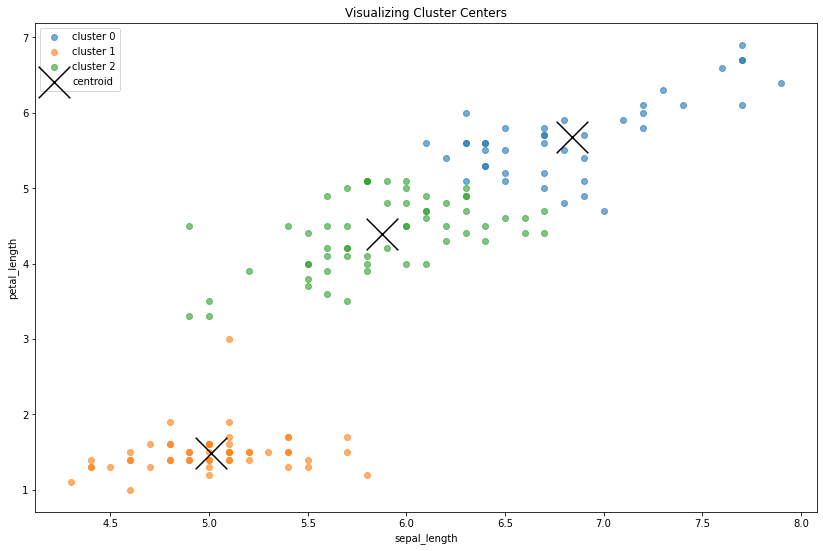

In [18]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

In [19]:
## this model does not know the answers or even the question being asked

## this model only evaluated the variables it was given and found the 3 most similar datapoints

## Exploring Different Values of k

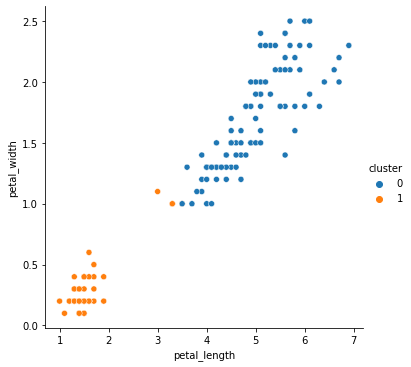

In [20]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
iris['cluster'] = kmeans.predict(X)

sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

In [21]:
## with only 2 clusters the model found the 2 most similar groups of data points

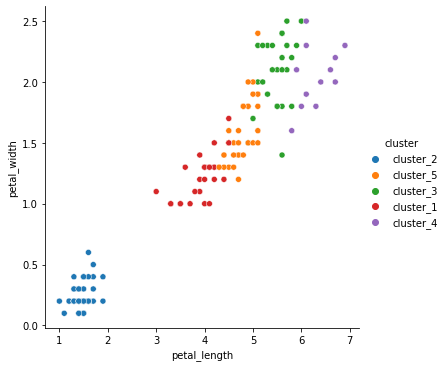

In [22]:
kmeans = KMeans(n_clusters=5).fit(X)
iris['cluster'] = kmeans.predict(X)
iris.cluster = 'cluster_' + (iris.cluster + 1).astype('str')
sns.relplot(data=iris, x='petal_length', y='petal_width', hue='cluster')

In [23]:
## with 5 clusters it becomes a little crowded

# Choosing k with Inertia

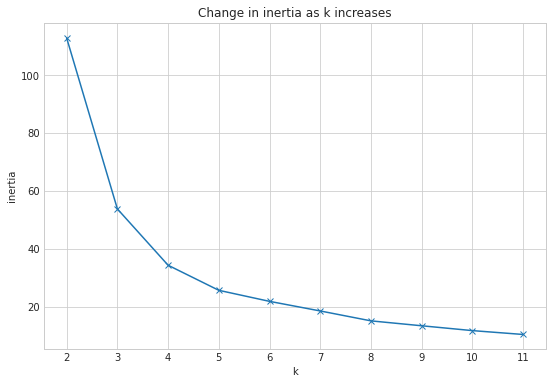

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [26]:
## inertia refers to the sum of squared distance from each datapoint to it's respective cluster center

## the more clusters there are the lower the inertia will be

## when you graph inertia to k you can visualize where the 'elbow' is

### the elbow is the point where the line 'bends', and shifts from being mostly vertical to horizontal

### in this particular case we could see that the elbow occurs at 4

## this is a best practice if you are uncertain what the k should be

## however since we have knowledge of this data set and know that there are only 3 unique catagoris in our
## target, we know we should only use 3 clusters

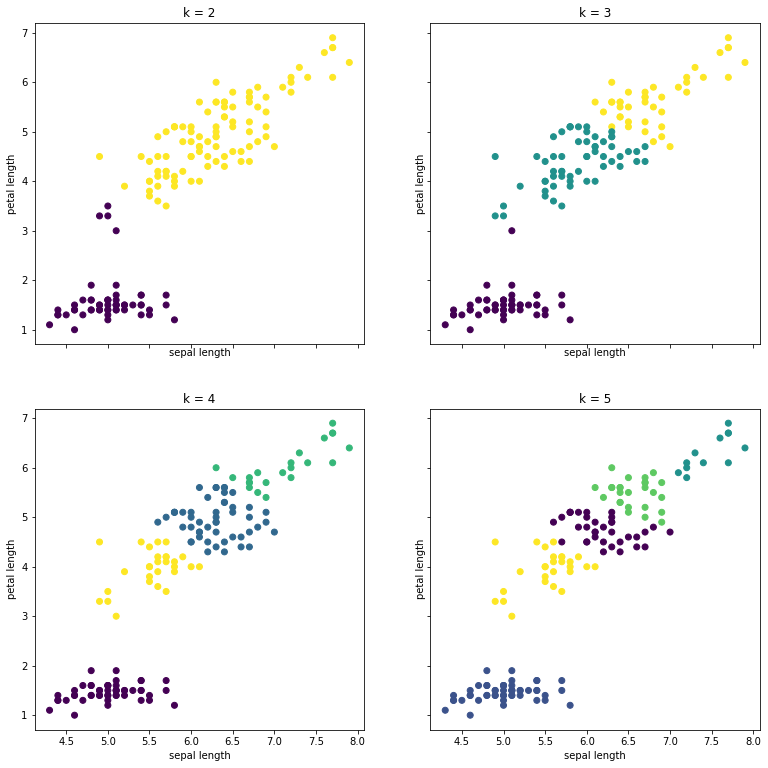

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_length, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')

In [ ]:
## we can see k = 4 is the most evenly distributed 

## however we are predicting species of which there are only 3

